In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import matplotlib
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks')

c:\program files\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [6]:
np.array([408, 597, 602, 609,223,391]).std()

143.73084413428995

In [45]:
#Chip14_P1_poort2_droog_04122019.txt
a = str(4)
b = str(5)

measurement = 'Chip 14 p'+a+' input '+b

bestand = 'Chip14_P'+a+'_poort'+b+'_droog_04122019.txt'

#bestand = 'Chip 14 ruis.txt'
data_folder = 'meetdata\\'

df = pd.read_csv(data_folder+bestand, sep="\t", header=None, decimal=',')
df.columns = ['l', 'I'] # wavelength (nm) and relative intensity (%)

print(measurement)

df.head()

Chip 14 p4 input 5


,l,I
0,1568.5675,0.0000
1,1568.4649,15.7496
2,1568.3623,18.3450
3,1568.2598,13.4473
4,1568.1572,13.3740


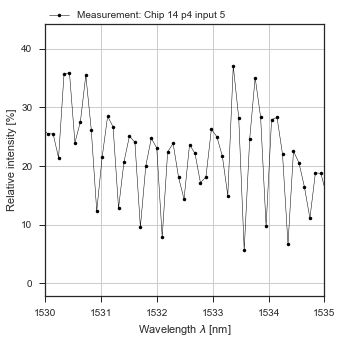

In [46]:
# x axis limits
xlim = True # True if you want to use x axis limits
x_min = 1530
x_max = 1535





plt.figure(figsize=((5,5)))
plt.plot(df.l, df.I, '.-', linewidth=0.5, marker='.', color='black', label='Measurement: '+measurement)

if xlim:
    plt.xlim((x_min, x_max))
    
plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]')
plt.ylabel(r'Relative intensity [%]')
plt.legend(loc=(0,1))

In [47]:
df.I.mean(), df.I.std()

(19.99414015151516, 7.161253551642717)

In [48]:
x_maxes = []
for T in tqdm(np.abs(df.l.diff())[1:]):
    # Number of samplepoints
    N = len(df.l)
    # sample spacing
    #T = np.abs(df.l.diff())
    x = df.l
    y = df.I

    yf = scipy.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

    fft_y = 2.0/N * np.abs(yf[:N//2])

    xf.shape, fft_y.shape

    df_fft = pd.DataFrame([xf, fft_y]).T
    df_fft.columns = ['lamb', 'I']

    #df_fft = df_fft[df_fft.lamb>0.01] # filter op lambda >0.1 (om de piek bij 0 er uit te halen)



    y_max = df_fft.I.idxmax()
    x_max = df_fft.lamb[y_max]

    x_maxes.append(x_max)
    #print("Piek golflengte: "),x_max
    
x_maxes = np.array(x_maxes)

100%|██████████████████████████████████████████████████████████████████████| 395/395 [00:05<00:00, 76.45it/s]


(array([  0.,   0.,   0.,   0.,   0., 395.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

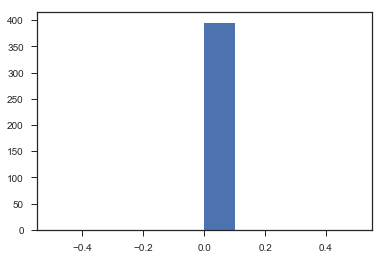

In [49]:
plt.hist(x_maxes)

Piek golflengte: 


(None, 2.6141006923701227)

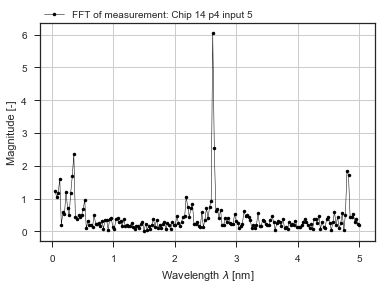

In [50]:
# Number of samplepoints
N = len(df.l)
# sample spacing
T = np.abs(df.l.diff())[1:].mean() # Gemiddelde T van alle punten
x = df.l
y = df.I

yf = scipy.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fft_y = 2.0/N * np.abs(yf[:N//2])

df_fft = pd.DataFrame([xf, fft_y]).T
df_fft.columns = ['lamb', 'I']

df_fft = df_fft[df_fft.lamb>0.03] # filter op lambda >0.03 (om de piek bij 0 er uit te halen)
df_fft = df_fft.reset_index(drop=True)


plt.plot(df_fft.lamb, df_fft.I, '.-', linewidth=0.5, marker='.', color='black', label='FFT of measurement: '+measurement)

plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]')
plt.ylabel(r'Magnitude [-]')
plt.legend(loc=(0,1))


y_max = df_fft.I.idxmax()
x_max = df_fft.lamb[y_max]


print("Piek golflengte: "),x_max

In [51]:
x_maxes.mean()

0.0

# Verschil in piek waarde bij fft met gemiddelde T en gemiddeld piek waarde bij individuele T waarden

# Resultaat

In [52]:
from scipy.signal import find_peaks

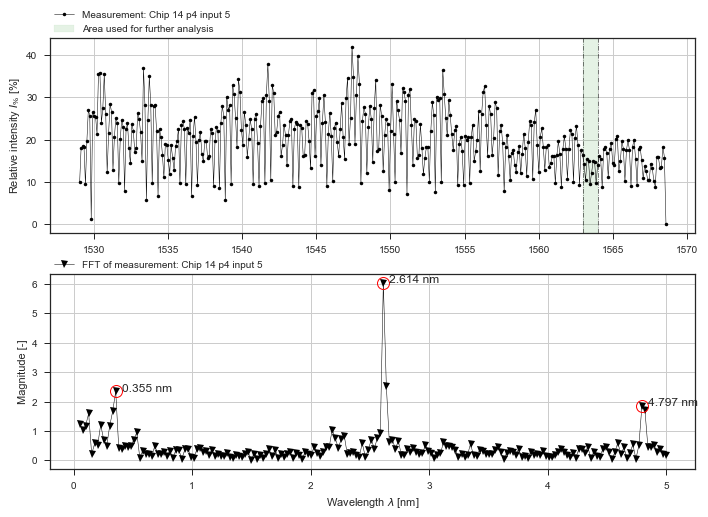

In [53]:
fontsize=12

xlim = False
xmin = 1530
xmax = 1535

matplotlib.rcParams.update({'font.size': fontsize})

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(df.l, df.I, '.-', linewidth=0.5, marker='.', color='black', label='Measurement: '+measurement)

plt.axvline(x=1563,  linewidth=0.75, color='black', linestyle='-.', alpha=0.7, label='__nolabel__')
plt.axvline(x=1564,  linewidth=0.75, color='black', linestyle='-.', alpha=0.7, label='__nolabel__')
plt.axvspan(1563, 1564, alpha=0.1, color='green', label='Area used for further analysis')

plt.legend(loc=(0,1), frameon=False)
plt.grid()
#plt.xlabel(r'Wavelength $\lambda$ [nm]', fontsize=fontsize)
plt.ylabel(r'Relative intensity $I_\%$ [%]')

if xlim:
    plt.xlim((xmin,xmax))

peaks , _ = find_peaks(df_fft.I, prominence=1, height=1.5)


#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=100, hspace=None)

plt.subplot(2,1,2)
plt.plot(df_fft.lamb, df_fft.I, '.-', linewidth=0.5, marker='v', color='black', label='FFT of measurement: '+measurement)
plt.plot(df_fft.lamb[peaks], df_fft.I[peaks], 'o', ms=12,markerfacecolor='none',markeredgewidth=1, markeredgecolor='red', label='_nolegend_') # peaks
plt.legend(loc=(0,1), frameon=False)
plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]')
plt.ylabel(r'Magnitude [-]')

for i_x, i_y in zip(df_fft.lamb[peaks], df_fft.I[peaks]):
    plt.text(i_x+0.05, i_y, '{:2.3f} nm'.format(i_x, i_y))

plt.tight_layout()
plt.savefig('figuren\\Chip_14_p4_input_5.png', dpi=300)
#plt.savefig('figuren\\'+measurement+'.png', dpi=150)

# Lorentz fit

In [54]:
from scipy.optimize import curve_fit

def lorentzian_pdf(x, x0, gamma, c=0):
    if gamma <= 0:
        return 0
    return 1/(np.pi*gamma*(1+((x-x0)/gamma)**2)) + c

def lorentzian_pdf_3(x, x00, gamma0, x01, gamma1, x02, gamma2, a, b, c):

    y = lorentzian_pdf(x=x, x0=x00, gamma=gamma0) + lorentzian_pdf(x=x, x0=x01, gamma=gamma1) + lorentzian_pdf(x=x, x0=x02, gamma=gamma2) - a*x**2 - b*x  +c

    return -y

Text(0,0.5,'Relative intensity [%]')

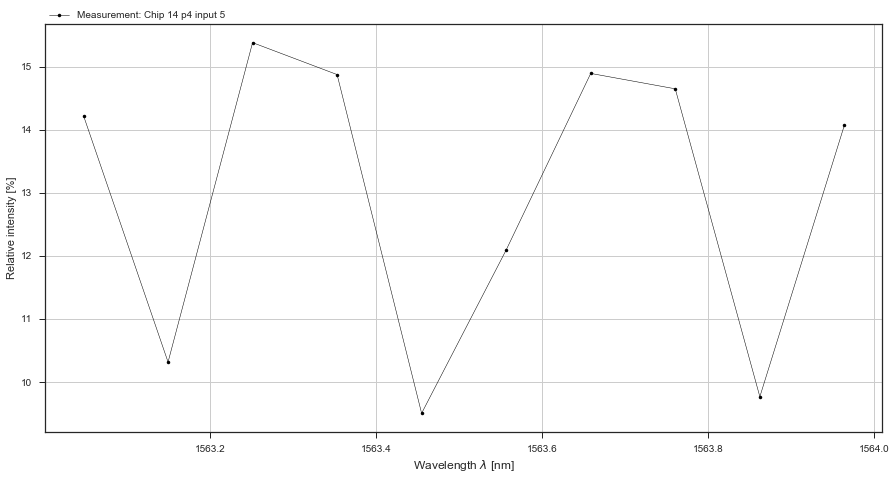

In [55]:
df1 = df[df.l.between(1563, 1564)] # selecteer een golflengte bereik
df1 = df1.reset_index(drop=True)

plt.figure(figsize=(15,7.5))


plt.plot(df1.l, df1.I, '.-', linewidth=0.5, marker='.', color='black', label='Measurement: '+measurement)
plt.legend(loc=(0,1), frameon=False)
plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]', fontsize=fontsize)
plt.ylabel(r'Relative intensity [%]')

1563.876924777586 0.051078574243530364 1563.478169239512 0.05000000000000001 1563.12602365974 0.05000000000000001 3.663790181022109e-13 3.693818985520232e-15 -15.67642972286645


Text(0,0.5,'Relative intensity $I_\\%$ \\quad [%]')

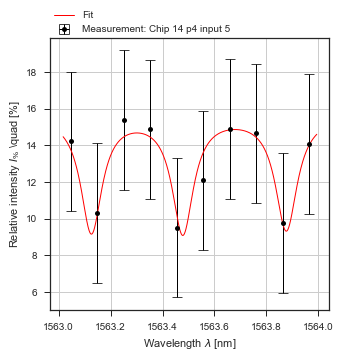

In [56]:
plt.figure(figsize=((5,5)))


n = 2

#x = np.arange(-15, 15, 0.05)
#y = lorentzian_pdf_8(x, x00, gamma0, x01, gamma1, x02, gamma2, x03, gamma3 , x04, gamma4 , x05, gamma5, x06, gamma6, x07, gamma7, a,b,c)

x = df1.l
y = df1.I

# 1 std van ruis is gelijk aan 3.8
plt.errorbar(x, y, fmt='o', yerr=3.8, xerr=5*10**(-12), ms=5, elinewidth=1, capthick=0.75, capsize=5, color='black', label='Measurement: '+measurement)



# fit het signaal met ruis
#popt, pcov = curve_fit(lorentzian_pdf_2, x, ydata, bounds=([-50 for _ in range(7)], [10 for _ in range(7)])) # range 7 voor 7 variabelen

parguess = (1563.2, 0.1, 1563.43, 0.1, 1563.85, 0.1,0.1, 0.005, -15) # parameter values guess


"""
LET OP, zeer gevoelig voor initiele parameter guesses !!
"""
popt, pcov = curve_fit(f=lorentzian_pdf_3, xdata=x, ydata=y, p0=parguess, bounds=([1563, 0.05, 1563, 0.05 , 1563, 0.05, 0, 0, -30],[1564.2, 1, 1564.6, 1, 1564, 1, 1, 1, 0]))
# plot punten
#plt.plot(x, y, '.', marker='.', ms=4, color='black')

x = np.arange(df1.l.iloc[-1]-0.03, df1.l.iloc[0]+0.03, 0.001) # indices -1 tot 0 omdat de golflengte afneemd per index
# plot fit
yfit = lorentzian_pdf_3(x, *popt)

#print(x)
#*variabelen = *popt

print(*popt)

plt.plot(x, yfit, 'r-', linewidth=1, label='Fit')

plt.grid()
plt.legend(loc=(0,1), frameon=False)


plt.xlabel('Wavelength $\lambda$ [nm]')
plt.ylabel('Relative intensity $I_\%$ \quad [%]')


#plt.savefig("figuren\\lorentz_fit_hhs.png", dpi=300)

In [57]:
def FWHM(gamma): 
    return 2*gamma

x00, gamma0, x01, gamma1, x02, gamma2, a, b, c = (*popt,)

fwhm0 = FWHM(gamma0)
fwhm1 = FWHM(gamma1)
fwhm2 = FWHM(gamma2)

fwhm = np.array([fwhm0, fwhm1, fwhm2])


print("FWHM mean: ", fwhm.mean())
print("FWHM std: ", fwhm.std())
print("FWHM all values: ", fwhm)


x0s = np.array([x00, x01, x02]) # array met alle x0's

x0s = np.sort(x0s, axis=-1) # sorteer laag naar hoog

print("x0 values: ", x0s)

FSR = np.diff(x0s) # bereken verschil tussen array elementen

print("FSR values: ", FSR)

FSR.mean(), FSR.std()

FWHM mean:  0.10071904949568693
FWHM std:  0.0010168895488179527
FWHM all values:  [0.10215715 0.1        0.1       ]
x0 values:  [1563.12602366 1563.47816924 1563.87692478]
FSR values:  [0.35214558 0.39875554]


(0.3754505589230348, 0.023304979151021143)

In [59]:
from scipy.stats import chisquare

In [66]:
expected = lorentzian_pdf_3(df1.l, *popt)
observed = df1.I

chisquare(observed, expected)

Power_divergenceResult(statistic=0.3097390431953726, pvalue=0.9999961886379048)

In [69]:
residuals = df1.I - lorentzian_pdf_3(df1.l, x00, gamma0, x01, gamma1, x02, gamma2, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((df1.I-np.mean(df1.I))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9159777640098502

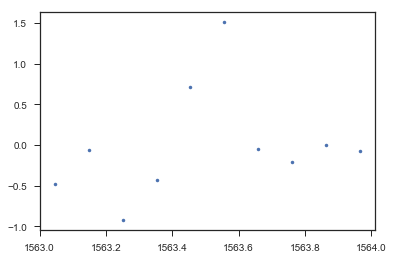

In [73]:
plt.plot(df1.l, expected-observed,'.')